## Target guided encodings

In the previous lectures in this section, we learned how to convert a label into a number, by using one hot encoding, replacing by a digit or replacing by frequency or counts of observations. These methods are simple, make (almost) no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the target mean (mean encoding / target encoding)
- Replacing the labels by the probability ratio of the target being 1 or 0
- Weight of evidence.

All of the above methods have something in common:

- the encoding is **guided by the target**, and
- they create a **monotonic relationship** between the variable and the target.


### Monotonicity

A monotonic relationship is a relationship that does one of the following:

- (1) as the value of one variable increases, so does the value of the other variable; or
- (2) as the value of one variable increases, the value of the other variable decreases.

In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.



### Advantages of target guided encodings

- Capture information within the category, therefore creating more predictive features
- Create a monotonic relationship between the variable and the target, therefore suitable for linear models
- Do not expand the feature space


### Limitations

- Prone to cause over-fitting
- Difficult to cross-validate with current libraries


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models.

===============================================================================

## Ordered Integer Encoding

Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

For example, we have the variable city with values London, Manchester and Bristol; if the default rate is 30% in London, 20% in Bristol and 10% in Manchester, then we replace London by 1, Bristol by 2 and Manchester by 3.

## In this demo:

We will see how to perform one hot encoding with:
- pandas
- Feature-Engine

And the advantages and limitations of these implementations using the House Prices dataset.

In [80]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.encoding import OrdinalEncoder

In [81]:
# load data

cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('..\\house_price.csv', usecols=cols)
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   Exterior1st   1460 non-null   object
 2   Exterior2nd   1460 non-null   object
 3   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [84]:
# check cardinality for each variable

for col in cols:
    print('Number of labels for {} : {}'.format(col, data[col].nunique()))

Number of labels for Neighborhood : 25
Number of labels for Exterior1st : 15
Number of labels for Exterior2nd : 16
Number of labels for SalePrice : 663


In [85]:
# let's explore the unique categories
data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [86]:
# let's explore the unique categories
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [87]:
# let's explore the unique categories
data['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [117]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(data,
                                                   data['SalePrice'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((1022, 4), (438, 4))

### Explore original relationship between categorical variables and target

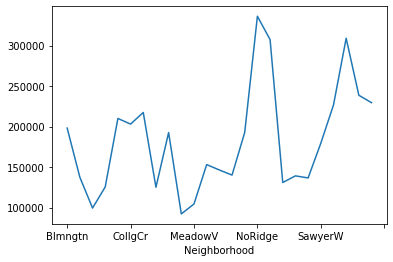

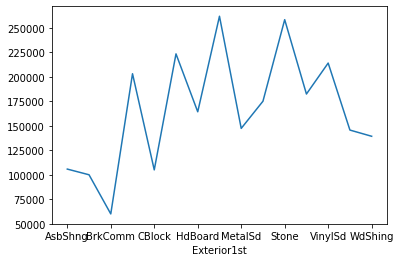

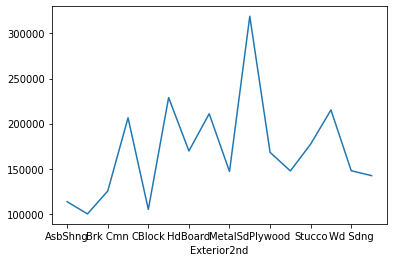

In [118]:
for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:

    X_train.groupby([var])['SalePrice'].mean().plot()
    plt.show();

You can see that the relationship between the target and the categories of the categorical variables goes up and down, depending on the category.


## Ordered Integer encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the encoding maps separately if planing to use them in production.

In [119]:
# lets get the sorted values of the neigborhood labels based on the target mean values
X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()

Neighborhood
IDOTRR      92174.166667
BrDale      99440.000000
MeadowV    104441.666667
Edwards    125082.676056
BrkSide    125438.414634
OldTown    130958.328767
Sawyer     136596.442623
Blueste    137500.000000
SWISU      139154.666667
NPkVill    140107.142857
NAmes      146435.264901
Mitchel    153070.444444
SawyerW    179463.088889
Gilbert    192662.290909
NWAmes     192788.235294
Blmngtn    198164.500000
CollgCr    203086.371429
ClearCr    210034.666667
Crawfor    217453.914286
Somerst    226644.196429
Veenker    229500.000000
Timber     238700.100000
NridgHt    307418.137255
StoneBr    309105.937500
NoRidge    336264.666667
Name: SalePrice, dtype: float64

In [120]:
sorted_index = X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values().index
sorted_index

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [121]:
# create dictionary for mapping
mapping = {k: i for i,k in enumerate(sorted_index)}
mapping

{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

In [122]:
X_train['Neighborhood'] = X_train['Neighborhood'].map(mapping)
X_train['Neighborhood'].head(10)

64      16
682     17
960      4
1384     3
1100     8
416      6
1034    18
853     10
472      3
1011     3
Name: Neighborhood, dtype: int64

In [123]:
## write the functions to perform these functions

def create_mappings(X_train, var, target):
    sorted_index = X_train.groupby([var])[target].mean().sort_values().index
    mapping = {k: i for i,k in enumerate(sorted_index, 0)}
    return mapping


# peform encoding
def intger_encode(X_train, X_test, var, mapping):
    X_train[var] = X_train[var].map(mapping)
    X_test[var] = X_test[var].map(mapping)

In [124]:
# and now we run a loop over the remaining categorical variables

for variable in ['Exterior1st', 'Exterior2nd']:
    mappings = create_mappings(X_train, variable, 'SalePrice')
    intger_encode(X_train, X_test, variable, mappings)

In [125]:
# check the results
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,16,11,13,219500
682,17,5,7,173000
960,4,5,8,116500
1384,3,4,4,105000
1100,8,5,7,60000


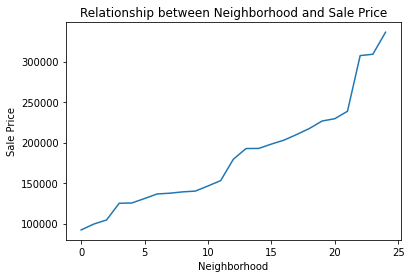

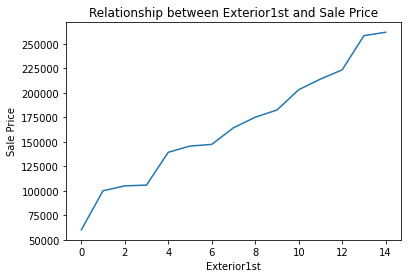

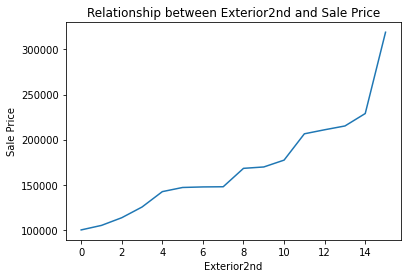

In [127]:
# now lets inspect the newly created monotonic relationship

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:

    X_train.groupby([var])['SalePrice'].mean().plot()
    plt.ylabel('Sale Price')
    plt.title('Relationship between {} and Sale Price'.format(var))
    plt.show();

## Integer Encoding with Scikit-learn

In [64]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [65]:
# create an encoder
le = LabelEncoder()
le.fit(X_train['Neighborhood'])

LabelEncoder()

In [66]:
le.classes_

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

In [67]:
X_train['Neighborhood'] = le.transform(X_train['Neighborhood'])
X_test['Neighborhood'] = le.transform(X_test['Neighborhood'])

X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,5,VinylSd,VinylSd
682,4,Wd Sdng,Wd Sdng
960,3,Wd Sdng,Plywood
1384,7,WdShing,Wd Shng
1100,18,Wd Sdng,Wd Sdng


Unfortunately, the LabelEncoder works one variable at the time. However there is a way to automate this for all the categorical variables. I took the below from this [stackoverflow thread](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)

In [68]:
# additional import required

from collections import defaultdict

In [69]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [70]:
d = defaultdict(LabelEncoder)

In [71]:
# Encoding the variable
train_transformed = X_train.apply(lambda x: d[x.name].fit_transform(x))

# # Using the dictionary to encode future data
test_transformed = X_test.apply(lambda x: d[x.name].transform(x))

In [72]:
train_transformed.head()

,Neighborhood,Exterior1st,Exterior2nd
64,5,12,13
682,4,13,14
960,3,13,10
1384,7,14,15
1100,18,13,14


In [73]:
test_transformed.head()

,Neighborhood,Exterior1st,Exterior2nd
529,6,13,11
491,12,13,14
459,3,8,8
279,4,9,10
655,2,6,7


In [74]:
# and to inverse transform to recover the original labels

# # Inverse the encoded
tmp = train_transformed.apply(lambda x: d[x.name].inverse_transform(x))
tmp.head()

,Neighborhood,Exterior1st,Exterior2nd
64,CollgCr,VinylSd,VinylSd
682,ClearCr,Wd Sdng,Wd Sdng
960,BrkSide,Wd Sdng,Plywood
1384,Edwards,WdShing,Wd Shng
1100,SWISU,Wd Sdng,Wd Sdng


## Integer Encoding with Feature-Engine

In [75]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],  # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [76]:
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary', # assign the values to the labels arbitrarily
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd']) # can give selective variables

ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [77]:
ordinal_enc.encoder_dict_

{'Neighborhood': {'CollgCr': 0,
  'ClearCr': 1,
  'BrkSide': 2,
  'Edwards': 3,
  'SWISU': 4,
  'Sawyer': 5,
  'Crawfor': 6,
  'NAmes': 7,
  'Mitchel': 8,
  'Timber': 9,
  'Gilbert': 10,
  'Somerst': 11,
  'MeadowV': 12,
  'OldTown': 13,
  'BrDale': 14,
  'NWAmes': 15,
  'NridgHt': 16,
  'SawyerW': 17,
  'NoRidge': 18,
  'IDOTRR': 19,
  'NPkVill': 20,
  'StoneBr': 21,
  'Blmngtn': 22,
  'Veenker': 23,
  'Blueste': 24},
 'Exterior1st': {'VinylSd': 0,
  'Wd Sdng': 1,
  'WdShing': 2,
  'HdBoard': 3,
  'MetalSd': 4,
  'AsphShn': 5,
  'BrkFace': 6,
  'Plywood': 7,
  'CemntBd': 8,
  'Stucco': 9,
  'BrkComm': 10,
  'AsbShng': 11,
  'ImStucc': 12,
  'CBlock': 13,
  'Stone': 14},
 'Exterior2nd': {'VinylSd': 0,
  'Wd Sdng': 1,
  'Plywood': 2,
  'Wd Shng': 3,
  'HdBoard': 4,
  'MetalSd': 5,
  'AsphShn': 6,
  'CmentBd': 7,
  'BrkFace': 8,
  'Stucco': 9,
  'ImStucc': 10,
  'Stone': 11,
  'AsbShng': 12,
  'Brk Cmn': 13,
  'CBlock': 14,
  'Other': 15}}

In [78]:
ordinal_enc.variables

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [79]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,0,0,0
682,1,1,1
960,2,1,2
1384,3,2,3
1100,4,1,1
